In [1]:
import tensorflow as tf

/Users/mac/anaconda2/envs/py3k/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# add a layer

In [26]:
def add_layer(inputs, in_size, out_size, activation_function = None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs,Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs
            
    
    
    

    

In [11]:
import numpy as np

## build data

In [12]:
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]

In [13]:
x_data

array([[-1.        ],
       [-0.99331104],
       [-0.98662207],
       [-0.97993311],
       [-0.97324415],
       [-0.96655518],
       [-0.95986622],
       [-0.95317726],
       [-0.94648829],
       [-0.93979933],
       [-0.93311037],
       [-0.9264214 ],
       [-0.91973244],
       [-0.91304348],
       [-0.90635452],
       [-0.89966555],
       [-0.89297659],
       [-0.88628763],
       [-0.87959866],
       [-0.8729097 ],
       [-0.86622074],
       [-0.85953177],
       [-0.85284281],
       [-0.84615385],
       [-0.83946488],
       [-0.83277592],
       [-0.82608696],
       [-0.81939799],
       [-0.81270903],
       [-0.80602007],
       [-0.7993311 ],
       [-0.79264214],
       [-0.78595318],
       [-0.77926421],
       [-0.77257525],
       [-0.76588629],
       [-0.75919732],
       [-0.75250836],
       [-0.7458194 ],
       [-0.73913043],
       [-0.73244147],
       [-0.72575251],
       [-0.71906355],
       [-0.71237458],
       [-0.70568562],
       [-0

In [14]:
noise = np.random.normal(0, 0.05, x_data.shape)

y_data = np.square(x_data) - 0.5 + noise

## build layer

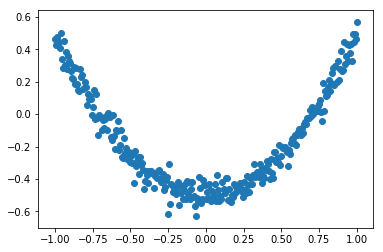

In [37]:
#input layer
xs = tf.placeholder(tf.float32,[None, 1])
ys = tf.placeholder(tf.float32,[None, 1])


layer1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)

prediction = add_layer(layer1, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    # plot result
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_data, y_data)

    plt.show(block=False)
    
    for i in range(1000):
        sess.run(train_step, feed_dict = {xs:x_data, ys:y_data})
        if i % 50 == 0:
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            prediction_value = sess.run(prediction, feed_dict={xs:x_data, ys: y_data})
            lines = ax.plot(x_data, prediction_value, 'r-', lw = 5)
            
            plt.pause(0.1)
            
#             print(sess.run(loss, feed_dict = {xs: x_data, ys:y_data}))
            
        
        

## plot results

In [28]:
import matplotlib.pyplot as plt